**Chapter 1 - The Machine Learning Landscape**

# Code Example 1-1

In [1]:
# Python >=3.5 is required
import sys
assert sys.version_info>=(3,5)

# Scikit-learn <=0.20 is required
import sklearn
assert sklearn.__version__>="0.20"

In [2]:
import os
import numpy as np
import pandas as pd
dataPath=os.path.join('datasets','lifesat')
os.listdir(dataPath)

['.ipynb_checkpoints', 'gdp_per_capita.csv', 'oecd_bli_2015.csv', 'test.ipynb']

In [201]:
import plotly.express as px
import plotly.graph_objects as go

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [266]:
# read dataset
gdp_per_capita=pd.read_csv(os.path.join(dataPath,'gdp_per_capita.csv'),
                           sep='\t',thousands=',',
                           error_bad_lines=False,
                           na_values='n\a')
oecd_bli=pd.read_csv(os.path.join(dataPath,'oecd_bli_2015.csv'),
                    thousands=',')
oecd_bli=oecd_bli[oecd_bli['INEQUALITY']=='TOT'].pivot(index='Country',columns='Indicator',values='Value')
gdp_per_capita.rename(columns={'2015':'GDP per Indicator'},inplace=True)
gdp_per_capita.set_index('Country',inplace=True)

In [273]:
full_country_stats=pd.merge(left=oecd_bli,
                            right=gdp_per_capita,
                           left_index=True,
                           right_index=True)

In [274]:
remove_indices=[0,1,6,8,33,34,35]
keep_indices=list(set(range(36))-set(remove_indices))

In [275]:
full_country_samples=full_country_stats[['GDP per Indicator','Life satisfaction']]

In [276]:
missing_data=full_country_stats[['GDP per Indicator','Life satisfaction']].iloc[remove_indices]

In [277]:
full_country_stats=full_country_stats[['GDP per Indicator','Life satisfaction']].iloc[keep_indices]

In [278]:
x=np.c_[full_country_stats['GDP per Indicator']]
y=np.c_[[full_country_stats['Life satisfaction']]]

In [279]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

In [74]:
# define a saver for saving figures
PROJECT_ROOT_DIR='.'
CHAPTER_ID='fundamentals'
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR,'images',CHAPTER_ID)
os.makedirs(IMAGES_PATH,exist_ok=True)

def save_fig(fig_id,tight_layout=True,fig_extension='png',resolution=300):
    path=os.path.join(IMAGE_PATH,fig_id+'.'+fig_extension)
    print('Saving figure',fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,dpi=resolution)

Saving figure regressor_comparison_fig
[6.59467536]
[5.73333333]


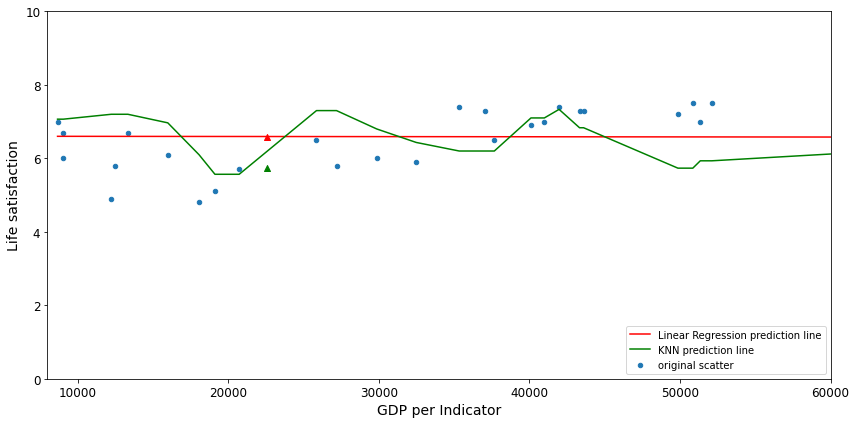

In [75]:
model=LinearRegression()
y=y.ravel()
model.fit(x,y)
y_pred=model.predict(x)

kNNmodel=KNeighborsRegressor(n_neighbors=3)
kNNmodel.fit(x,y)
y_pred1=kNNmodel.predict(x)

full_country_stats.plot(kind='scatter',
                       x='GDP per Indicator',
                       y='Life satisfaction',
                       figsize=(12,6),
                       label='original scatter')
plt.plot(x,y_pred,'r',label='Linear Regression prediction line')
plt.plot(sorted(x),y_pred1,'g',label='KNN prediction line')
inst_pred=model.predict([[22587]])
inst_pred1=kNNmodel.predict([[22587]])
plt.scatter(x=22587,y=inst_pred,marker='^',color='r')
plt.scatter(x=22587,y=inst_pred1,marker='^',color='g')
plt.legend(loc='lower right')
plt.axis([8000,60000,0,10])
save_fig('regressor_comparison_fig')
print(inst_pred)
print(inst_pred1)

In [119]:
print(model.intercept_,model.coef_)

6.6033092838737595 [-3.82252052e-07]


In [122]:
# print(kNNmodel.intercept_,kNNmodel.coef_)

## Examining the dataset

In [38]:
full_country_stats.sample(3)

,GDP per Indicator,Life satisfaction
Country,,
Finland,41973.988,7.4
Denmark,52114.165,7.5
Slovenia,20732.482,5.7


In [43]:
full_country_stats.loc['Denmark']

GDP per Indicator    52114.165
Life satisfaction        7.500
Name: Denmark, dtype: float64

In [39]:
oecd_bli.sample(3)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Greece,27.0,3.7,6.5,0.7,68.0,6.16,49.0,1.6,18575.0,14579.0,...,18.39,25503.0,83.0,1.2,74.0,466.0,14.91,64.0,69.0,18.6
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [40]:
gdp_per_capita.sample(3)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per Indicator,Estimates Start After
Country,,,,,,
Romania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8906.296,2015.0
Kiribati,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1427.619,2013.0
Belgium,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",40106.632,2014.0


Saving figure money_happy_scatterplot


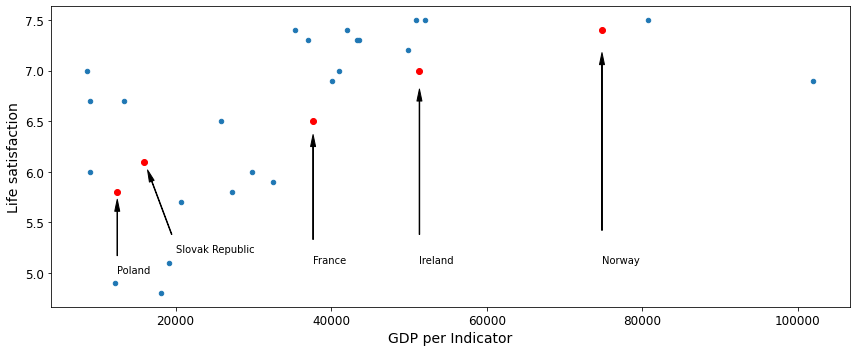

In [73]:
# annotated plot
position_text={'Poland':(12495.3,5.0),
               'Slovak Republic':(19991.7,5.2),
               'France':(37675.01,5.1),
               'Ireland':(51350.7,5.1),
               'Norway':(74822.1,5.1)
              }
full_country_stats.plot(kind='scatter',
                       x='GDP per Indicator',
                       y='Life satisfaction',
                       figsize=(12,5))
# plt.axis([8000,60000,0,10])

for country,pos_text in position_text.items():
    pos_data_x,pos_data_y=full_country_stats.loc[country]
    plt.annotate(country,
                xy=(pos_data_x,pos_data_y),
                xytext=pos_text,
                arrowprops=dict(facecolor='black',
                                width=0.5,
                                shrink=0.1,
                               headwidth=5))
    
    plt.plot(pos_data_x,pos_data_y,'ro')
save_fig('money_happy_scatterplot')

Saving figure tweaking_model_params_plot


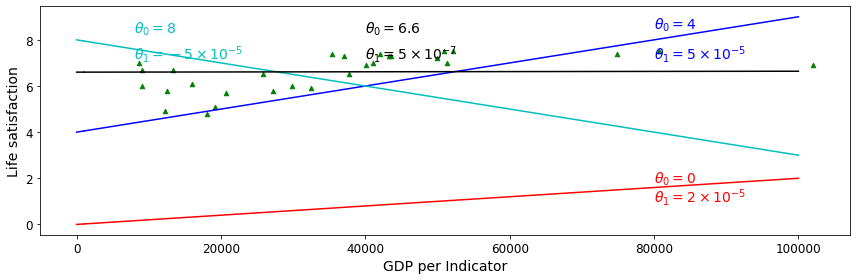

In [127]:
# fitting models to the datasets
full_country_stats.plot(kind='scatter',
                       x='GDP per Indicator',
                       y='Life satisfaction',
                       figsize=(12,4),
                       color='g',
                       marker='^')
# plt.axis([0,120000,4.5,8.0])
X=np.linspace([0,100000],1000)
plt.plot(X,2*X/100000,'r')
plt.text(80000,1.8,r"$\theta_0=0$",fontsize=14,color='r')
plt.text(80000,1.0,r'$\theta_1=2 \times 10^{-5}$',fontsize=14,color='r')

plt.plot(X,4+5*X/100000,'b')
plt.text(80000,8.5,r"$\theta_0=4$",fontsize=14,color='b')
plt.text(80000,7.2,r"$\theta_1=5\times10^{-5}$",fontsize=14,color='b')

plt.plot(X,8-5*X/100000,'c')
plt.text(8000,8.3,r"$\theta_0=8$",fontsize=14,color='c')
plt.text(8000,7.2,r"$\theta_1=-5 \times 10^{-5}$",fontsize=14,color='c')

plt.plot(X,6.6+4*X/10000000,'k')
plt.text(40000,8.3,r"$\theta_0=6.6$",fontsize=14,color='k')
plt.text(40000,7.2,r"$\theta_1=5\times 10^{-7}$",fontsize=14,color='k')
save_fig('tweaking_model_params_plot')


In [129]:
# Train a model to make prediction
lin1=LinearRegression()
Xsample=np.c_[full_country_stats['GDP per Indicator']]
ysample=np.c_[full_country_stats['Life satisfaction']]
lin1.fit(Xsample,ysample)
t0,t1=lin1.intercept_[0],lin1.coef_[0][0]
print(t0,t1)

5.821070654502937 2.1516816363324514e-05


Saving figure best_fit_model_fig


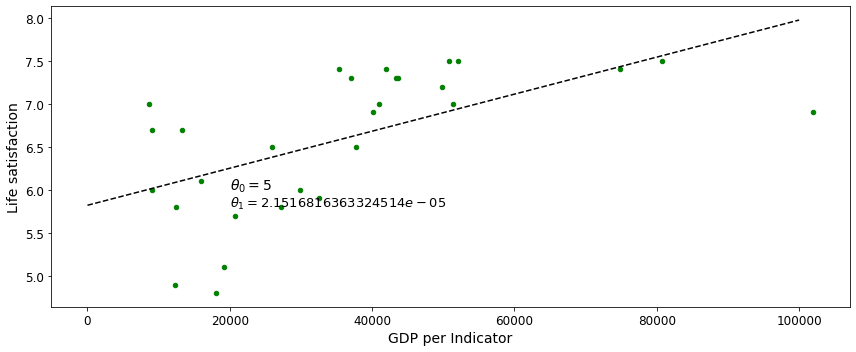

In [155]:
# plot the decision line
full_country_stats.plot(kind='scatter',
                       x='GDP per Indicator',
                       y='Life satisfaction',
                       color='g',
                       figsize=(12,5))
X=np.linspace(0,100000,1000)
plt.plot(X,t1*X+t0,'k--',label='prediction line')
plt.text(20000,6.0,r"$\theta_0=%d$"%t0,fontsize=14)
plt.text(20000,5.8,r"$\theta_1={}$".format(t1),fontsize=13)
save_fig('best_fit_model_fig')

In [164]:
# using model lin1 to predict the life satisfaction of a specific country
cryprus_gdp_per_capita=gdp_per_capita.loc['Cyprus']['GDP per Indicator']
print(cryprus_gdp_per_capita)
cryprus_predicted_life_satisfaction=lin1.predict([[cryprus_gdp_per_capita]])[0][0]
print(cryprus_predicted_life_satisfaction)

22587.49
6.3070815289413655


Saving figure cyprus_prediction_plot


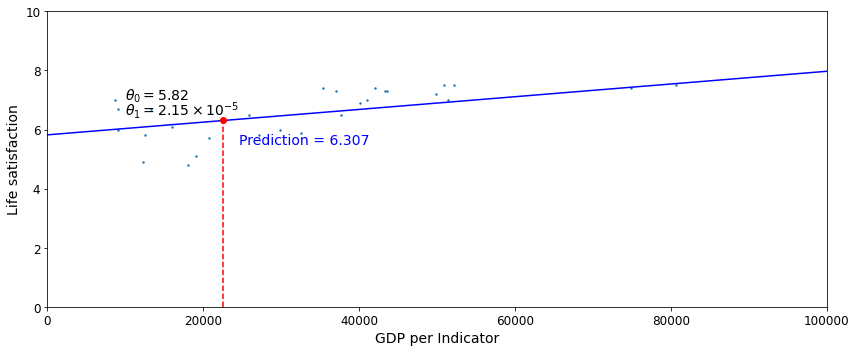

In [203]:
full_country_stats.plot(kind='scatter',
                       x='GDP per Indicator',
                       y='Life satisfaction',
                       figsize=(12,5),
                       s=2)
X=np.linspace(0,100000,1000)
plt.plot(X,t0+t1*X,"b")
plt.text(10000,7.0,r"$\theta_0=5.82$",fontsize=14)
plt.text(10000,6.5,r"$\theta_1=2.15 \times 10^{-5}$",fontsize=14)
plt.plot(cryprus_gdp_per_capita,cryprus_predicted_life_satisfaction,'ro')
plt.plot([cryprus_gdp_per_capita,cryprus_gdp_per_capita],[0,cryprus_predicted_life_satisfaction],'r--')
plt.text(cryprus_gdp_per_capita+2000,5.5,r"Prediction = {}".format(round(cryprus_predicted_life_satisfaction,3)),fontsize=14,color='b')
plt.axis([0,100000,0,10])
save_fig("cyprus_prediction_plot")

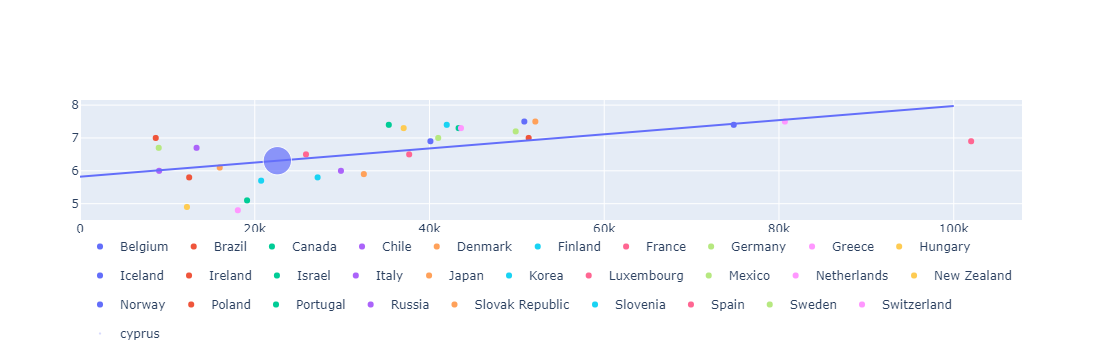

In [254]:
fig1=px.scatter(full_country_stats,
          x='GDP per Indicator',
          y='Life satisfaction',
          hover_name=full_country_stats.index,
          color=full_country_stats.index)
X=np.linspace(0,100000,1000)
fig2=px.line(x=X,
            y=t0+t1*X)
fig4=px.scatter(x=[cryprus_gdp_per_capita],
               y=[cryprus_predicted_life_satisfaction],
               size=[.01],
               hover_name=['cyprus'],
               symbol=['cyprus']
               )

fig3=go.Figure(data=fig1.data+fig2.data+fig4.data)
fig3.layout.legend.orientation='h'
fig3.show()

In [285]:
missing_data

,GDP per Indicator,Life satisfaction
Country,,
Australia,50961.865,7.3
Austria,43724.031,6.9
Czech Republic,17256.918,6.5
Estonia,17288.083,5.6
Turkey,9437.372,5.6
United Kingdom,43770.688,6.8
United States,55805.204,7.2


In [320]:
position_texts={'Australia':(65000,3.9),
                'Austria':(60000,3.5),
                'Czech Republic':(30000,3.5),
                'Estonia':(17000,3.6),
                'Turkey':(9000,3.6),
                'United Kingdom':(43000,3.8),
                'United States':(70000,5.2)
               }

Saving figure representative_training_data_scatterplot


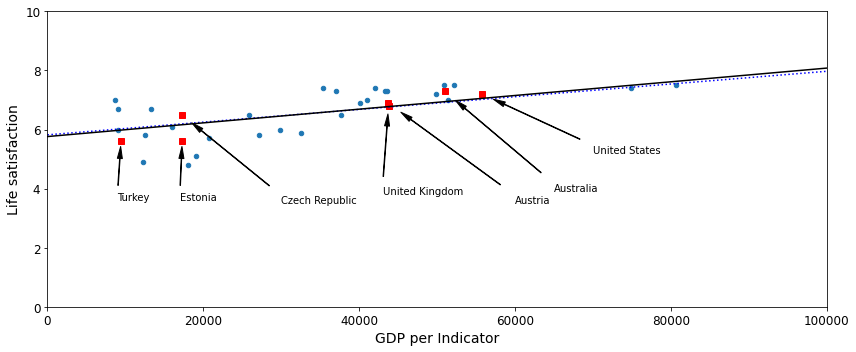

In [328]:
# add missing data check the influences of the model
full_country_stats.plot(kind='scatter',
                        x='GDP per Indicator',
                        y='Life satisfaction',
                        figsize=(12,5)
                       )
plt.axis([0,100000,0,10])
for country,pos_text in position_texts.items():
    pos_data_x,pos_data_y=missing_data.loc[country]
    plt.plot(pos_data_x,pos_data_y,'rs')
    plt.annotate(country,
                xy=(pos_data_x,pos_data_y),
                xytext=pos_text,
                arrowprops=dict(facecolor='black',
                                width=0.5,
                                shrink=0.1,
                                headwidth=5
                               ))
X=np.linspace(0,100000,1000)
plt.plot(X,t0+t1*X,'b:')
X_full=np.c_[full_country_samples['GDP per Indicator']]
y_full=np.c_[full_country_samples['Life satisfaction']]
lin_reg_full=LinearRegression()
lin_reg_full.fit(X_full,y_full)
t0full,t1full=lin_reg_full.intercept_[0],lin_reg_full.coef_[0][0]
plt.plot(X,t0full+t1full*X,'k-')
save_fig('representative_training_data_scatterplot')

C:\Users\bo.pei\AppData\Roaming\Python\Python37\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning:

overflow encountered in multiply

C:\Users\bo.pei\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning:

overflow encountered in reduce



Saving figure overfitting_model_plot


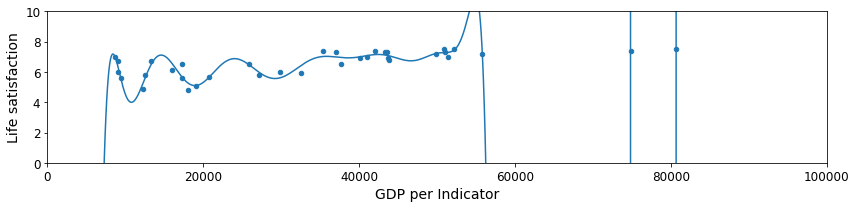

In [337]:
# Polynomial fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

full_country_samples.plot(kind='scatter',
                          x='GDP per Indicator',
                          y='Life satisfaction',
                          figsize=(12,3)
                         )
poly=PolynomialFeatures(degree=60,include_bias=False)
scaler=StandardScaler()
lin_reg2=LinearRegression()

pipeline_reg=Pipeline([('poly',poly),
                       ('scaler',scaler),
                       ('lin',lin_reg2)
                      ])

pipeline_reg.fit(X_full,y_full)
curve=pipeline_reg.predict(X[:,np.newaxis])
plt.plot(X,curve)
plt.axis([0,100000,0,10])
save_fig('overfitting_model_plot')

Saving figure ridge_model_plot


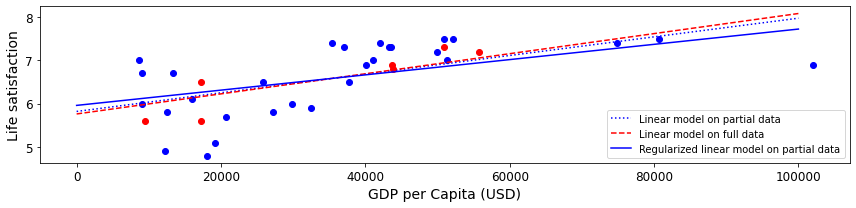

In [352]:
from sklearn import linear_model
plt.figure(figsize=(12,3))
plt.plot(list(full_country_stats['GDP per Indicator']),list(full_country_stats['Life satisfaction']),'bo')
plt.plot(list(missing_data['GDP per Indicator']),list(missing_data['Life satisfaction']),'ro')

X=np.linspace(0,100000,1000)
plt.plot(X,t0+t1*X,'b:',label='Linear model on partial data')
plt.plot(X,t0full+t1full*X,'r--',label='Linear model on full data')

ridge=linear_model.Ridge(alpha=10**9.5)
Xsample=np.c_[full_country_stats['GDP per Indicator']]
ysample=np.c_[full_country_stats['Life satisfaction']]

ridge.fit(Xsample,ysample)
t0ridge,t1ridge=ridge.intercept_[0],ridge.coef_[0][0]
plt.plot(X,t0ridge+t1ridge*X,'b',label='Regularized linear model on partial data')

plt.legend(loc='lower right')
# plt.axis([0,100000,0,10])
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Life satisfaction')
save_fig('ridge_model_plot')